In [1]:
#List the files of the directory --> collected from crawler
import os
import numpy as np
file_name = os.listdir(os.getcwd())

print file_name

['.ipynb_checkpoints', '.picasa.ini', 'centos5.11.6a77cdcd4e51.0', 'centos5.a0f8e1c9ede0.0', 'centos6.6.19494226358d.0', 'centos6.7.55c7f40f0eac.0', 'centos6.8.7f4c7d980794.0', 'centos6.9.fc5fcc54e9be.0', 'centos6.a8b14a36fb59.0', 'centos7.0.1406.f6175eb9936f.0', 'centos7.1.1503.97bb3c044d41.0', 'centos7.2.1511.3396d9e7ba26.0', 'centos7.3.1611.90e3d7fbcc20.0', 'centos7.4.1708.558fa9c5643a.0', 'centos7.59d57860f4ae.0', 'crawler metric processing.ipynb', 'crawler_collected_files', 'Crawler_Exercise', 'dummy_image.png', 'ubuntu10.04.e11366eb15a4.0', 'ubuntu12.04.2c67f0261f71.0', 'ubuntu12.04.5.1a0e573b9665.0', 'ubuntu12.10.7a838b8719e1.0', 'ubuntu13.04.9588ae629aea.0', 'ubuntu13.10.86c64f9624e7.0', 'ubuntu14.04.1.fdbe7226379e.0', 'ubuntu14.04.2.fb4035e1c467.0', 'ubuntu14.04.3.9bd5b4d0cd69.0', 'ubuntu14.04.4.c83e5a548c50.0', 'ubuntu14.04.5.0db3a66d6794.0', 'ubuntu14.04.d9664eaca4a5.0', 'ubuntu15.10.2a6b350b49f3.0', 'ubuntu16.04.579859c874dc.0', 'ubuntu16.10.ec782ccc466e.0', 'ubuntu17.04.14

In [2]:
#A function to count the number of times, a unigram is present in the collected metrics file
def unigram_counter(line_holder,unigram):
    container_files = []
    for line in line_holder:
        if unigram in line:
            container_files.append(line)
        else:
            pass
    return(len(container_files))

#List of frequency used unigram in ubuntu and centos containers
unigram_list = ['RPM-GPG-KEY-CentOS','CentOS-Debuginfo.repo','CentOS-Media.repo','CentOS-fasttrack.repo','centos-x86_64','centos-noarch','centos-release','/etc/mke2fs.conf','/etc/yum.repos.d','/etc/yum','/etc/pki/rpm-gpg','usr/share/terminfo','charmaps','/usr/lib/rpm/','/var/lib/rpm/','/var/lib/yum/yumdb','centos-release','dpkg/origins/ubuntu','/etc/depmod.d/ubuntu.conf','ubuntu-archive-keyring','ubuntu-archive','ubuntu-keyring','archive.ubuntu.com','/etc/debian_version','/etc/bash.bashrc','/etc/rc1.d','/etc/init/hostname.conf','chown','udevadm','udevadm','apt-cache','udevadm','udevadm','/usr/share/X11','/usr/share/common-licenses','Dpkg','Debconf','dpkg-divert','libgthread','x86_64-linux-gnu','/usr/lib/apt/','pam_unix','debconf','apt-utils','ntpdate','tasksel']

#Processing for metrics collected from centos container
feature_extract_files=[]
feature_extract_values=[]
for metric_file in file_name:
    if metric_file.startswith('c') and metric_file.endswith('0'):
        #print '****************',metric_file,'*************************'
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            line_holder.append(line)
        container_files = []
        for line in line_holder:
            if 'package' and 'yum' in line:
                container_files.append(line)
            else:
                pass
        for unigram in unigram_list:
            feature_extract_values.append(unigram_counter(line_holder,unigram))
        feature_extract_values.append(len(container_files))
        feature_extract_values.append('centos')
        feature_extract_files.append(feature_extract_values)
        feature_extract_values=[]

In [3]:
#Processing for metrics collected from ubuntu container
for metric_file in file_name:
    if metric_file.startswith('u') and metric_file.endswith('0'):
        #print '****************',metric_file,'*************************'
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            line_holder.append(line)
        container_files = []
        for line in line_holder:
            if 'package' and 'apt' in line:
                container_files.append(line)
            else:
                pass
        for unigram in unigram_list:
            feature_extract_values.append(unigram_counter(line_holder,unigram))
        feature_extract_values.append(len(container_files))
        feature_extract_values.append('ubuntu')
        feature_extract_files.append(feature_extract_values)
        feature_extract_values=[]

In [4]:
#Create the datafram with the columns as unigram 
unigram_list.append('Package+apt')
unigram_list.append('OS_type')
dataset_columns=unigram_list

import pandas as pd

df = pd.DataFrame(feature_extract_files, columns=dataset_columns)

In [5]:
#Printing the dataframe
df.head(20)

,RPM-GPG-KEY-CentOS,CentOS-Debuginfo.repo,CentOS-Media.repo,CentOS-fasttrack.repo,centos-x86_64,centos-noarch,centos-release,/etc/mke2fs.conf,/etc/yum.repos.d,/etc/yum,...,libgthread,x86_64-linux-gnu,/usr/lib/apt/,pam_unix,debconf,apt-utils,ntpdate,tasksel,Package+apt,OS_type
0,1,1,1,1,48,32,18,1,8,12,...,2,0,0,5,0,0,0,0,1071,centos
1,1,1,1,1,48,32,18,1,8,12,...,2,0,0,5,0,0,0,0,1071,centos
2,4,1,1,1,9,18,13,0,6,14,...,2,0,0,5,0,0,0,0,1399,centos
3,4,1,1,1,0,0,4,0,6,14,...,2,0,0,5,0,0,0,0,159,centos
4,4,1,1,1,0,9,13,0,6,15,...,2,0,0,5,0,0,0,0,1408,centos
5,4,1,1,1,18,9,13,0,6,15,...,2,0,0,5,0,0,0,0,1408,centos
6,4,1,1,1,18,9,13,0,6,15,...,2,0,0,5,0,0,0,0,1390,centos
7,3,1,0,0,0,26,16,0,5,15,...,2,0,0,5,0,0,0,0,1413,centos
8,3,1,0,1,0,26,15,0,7,18,...,2,0,0,5,0,0,0,0,1416,centos
9,3,1,1,1,22,11,19,0,8,21,...,2,0,0,5,0,0,0,0,1684,centos


In [6]:
#Save the dataframe into csv file
df.to_csv('ubuntu_centos_classification.csv', sep=',',encoding='utf-8', index=False)

In [7]:
#Creating a dictorinay that holds the ASCII value of all the characters of the file collected by crawler
Ascii_dictionary = {}

#Processing for the centos container
filecounter = 0
for metric_file in file_name:
    if metric_file.startswith('c') and metric_file.endswith('0'):
        filecounter=filecounter+1
        #print '****************',metric_file,'*************************'
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            ascii_val = [ord(c) for c in list(str(line))]    
            line_holder.append(ascii_val)
        Ascii_dictionary['file_centos_{0}'.format(filecounter)] = line_holder   
        print "Number of lines in file for centos:",len(line_holder)

#Processing for the ubuntu container
filecounter = 0
for metric_file in file_name:
    if metric_file.startswith('u') and metric_file.endswith('0'):
        filecounter=filecounter+1
        #print '****************',metric_file,'*************************'
        fp = open(metric_file, "r")
        line_holder=[]
        for line in fp:
            ascii_val = [ord(c) for c in list(str(line))]    
            line_holder.append(ascii_val)
        Ascii_dictionary['file_ubuntu_{0}'.format(filecounter)] = line_holder   
        print "Number of lines in file for ubuntu:",len(line_holder)
   

Number of lines in file for centos: 17304
Number of lines in file for centos: 17325
Number of lines in file for centos: 11078
Number of lines in file for centos: 8958
Number of lines in file for centos: 10417
Number of lines in file for centos: 10431
Number of lines in file for centos: 10393
Number of lines in file for centos: 10732
Number of lines in file for centos: 10783
Number of lines in file for centos: 9559
Number of lines in file for centos: 9927
Number of lines in file for centos: 10005
Number of lines in file for centos: 9963
Number of lines in file for ubuntu: 8611
Number of lines in file for ubuntu: 6665
Number of lines in file for ubuntu: 6665
Number of lines in file for ubuntu: 6622
Number of lines in file for ubuntu: 6481
Number of lines in file for ubuntu: 6367
Number of lines in file for ubuntu: 10329
Number of lines in file for ubuntu: 10344
Number of lines in file for ubuntu: 10346
Number of lines in file for ubuntu: 10355
Number of lines in file for ubuntu: 10369
Nu

In [8]:
#Finding the maximum length of line from all the collected files
Ascii_dictionary_keys = sorted(Ascii_dictionary.keys())
lines_length = []

for dict_key in Ascii_dictionary_keys:
    for i in range(len(Ascii_dictionary[dict_key])):
        lines_length.append(len(Ascii_dictionary[dict_key][i]))
    
maximum_length_line = max(lines_length)
print "Maximum length of the line among all the files is:",maximum_length_line

Maximum length of the line among all the files is: 648


In [9]:
#Fill the line to make them equal length
Image_ubunut_centos_dictionary = {}

class MyList(list):
    def ljust(self, n, fillvalue=255):
        return self + [fillvalue] * (n - len(self))

for dict_key in Ascii_dictionary_keys:
    Image_pixel_save=[]
    for i in range(len(Ascii_dictionary[dict_key])):    
        a = MyList(Ascii_dictionary[dict_key][i])
        b = a.ljust(maximum_length_line)
        Image_pixel_save.append(b)
    Image_ubunut_centos_dictionary['pixel_{0}'.format(dict_key)] = Image_pixel_save 
    print "shape of the {0} image is: {1}".format(dict_key,np.asarray(Image_pixel_save).shape)

shape of the file_centos_1 image is: (17304L, 648L)
shape of the file_centos_10 image is: (9559L, 648L)
shape of the file_centos_11 image is: (9927L, 648L)
shape of the file_centos_12 image is: (10005L, 648L)
shape of the file_centos_13 image is: (9963L, 648L)
shape of the file_centos_2 image is: (17325L, 648L)
shape of the file_centos_3 image is: (11078L, 648L)
shape of the file_centos_4 image is: (8958L, 648L)
shape of the file_centos_5 image is: (10417L, 648L)
shape of the file_centos_6 image is: (10431L, 648L)
shape of the file_centos_7 image is: (10393L, 648L)
shape of the file_centos_8 image is: (10732L, 648L)
shape of the file_centos_9 image is: (10783L, 648L)
shape of the file_ubuntu_1 image is: (8611L, 648L)
shape of the file_ubuntu_10 image is: (10355L, 648L)
shape of the file_ubuntu_11 image is: (10369L, 648L)
shape of the file_ubuntu_12 image is: (10371L, 648L)
shape of the file_ubuntu_13 image is: (6189L, 648L)
shape of the file_ubuntu_14 image is: (3632L, 648L)
shape of t

In [10]:
#Finding the maximum length of file (maximum number of lines) from all the collected files
Image_ubunut_centos_dictionary_key = sorted(Image_ubunut_centos_dictionary.keys())
pixel_files_length = []

for dict_key in Image_ubunut_centos_dictionary_key:
    pixel_files_length.append(len(Image_ubunut_centos_dictionary[dict_key]))
    
maximum_pixel_files_length = max(pixel_files_length)
print "Maximum number of lines among all the files is:",maximum_pixel_files_length

Maximum number of lines among all the files is: 17325


In [11]:
#Pad the file so that all the files have equal number of lines. 
#Doig this make all the images of equal size (pixel)
def pixel_padding(given_list, maximum_length_line, n, fillvalue=255):
    filled_list = [fillvalue] * maximum_length_line
    for steps in range(n - len(given_list)):
        given_list.append(filled_list)
    return given_list

for dict_key in Image_ubunut_centos_dictionary_key:
    Image_ubunut_centos_dictionary[dict_key] = pixel_padding(Image_ubunut_centos_dictionary[dict_key],maximum_length_line, maximum_pixel_files_length)
    print "shape of the {0} image is: {1}".format(dict_key,np.asarray(Image_ubunut_centos_dictionary[dict_key]).shape)

shape of the pixel_file_centos_1 image is: (17325L, 648L)
shape of the pixel_file_centos_10 image is: (17325L, 648L)
shape of the pixel_file_centos_11 image is: (17325L, 648L)
shape of the pixel_file_centos_12 image is: (17325L, 648L)
shape of the pixel_file_centos_13 image is: (17325L, 648L)
shape of the pixel_file_centos_2 image is: (17325L, 648L)
shape of the pixel_file_centos_3 image is: (17325L, 648L)
shape of the pixel_file_centos_4 image is: (17325L, 648L)
shape of the pixel_file_centos_5 image is: (17325L, 648L)
shape of the pixel_file_centos_6 image is: (17325L, 648L)
shape of the pixel_file_centos_7 image is: (17325L, 648L)
shape of the pixel_file_centos_8 image is: (17325L, 648L)
shape of the pixel_file_centos_9 image is: (17325L, 648L)
shape of the pixel_file_ubuntu_1 image is: (17325L, 648L)
shape of the pixel_file_ubuntu_10 image is: (17325L, 648L)
shape of the pixel_file_ubuntu_11 image is: (17325L, 648L)
shape of the pixel_file_ubuntu_12 image is: (17325L, 648L)
shape o

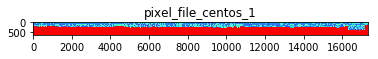

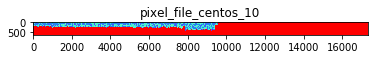

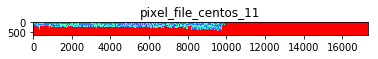

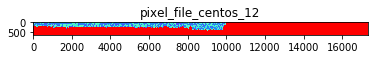

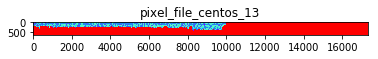

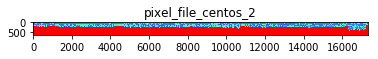

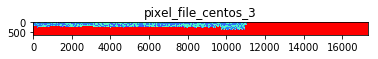

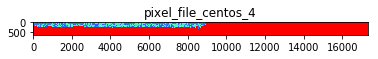

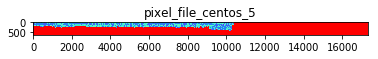

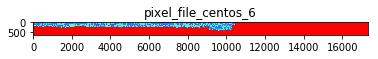

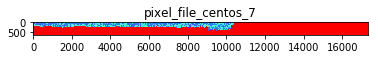

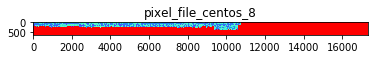

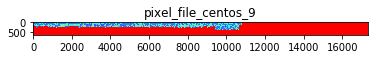

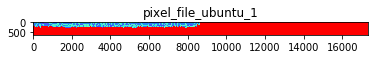

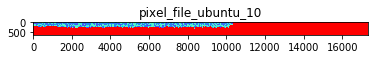

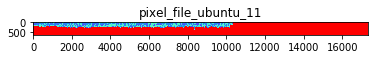

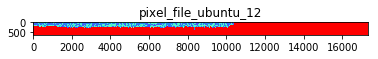

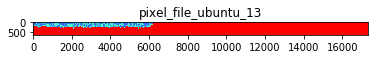

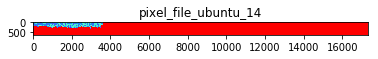

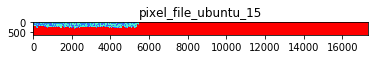

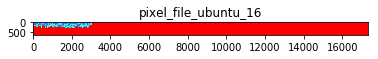

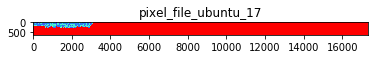

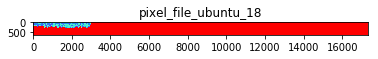

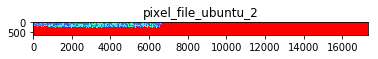

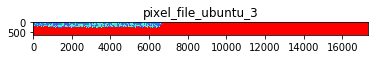

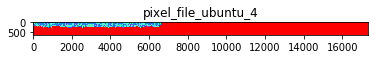

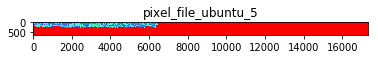

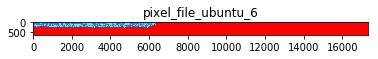

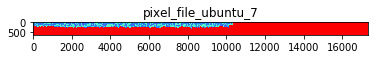

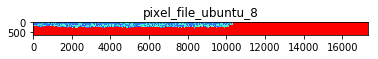

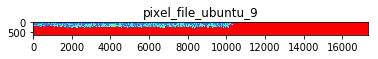

In [15]:
#Plotting the image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#plt.imsave('dummy_image.png', np.array(Image_ubunut_centos_dictionary[Image_ubunut_centos_dictionary_key[2]]), cmap=cm.gray)

for dict_key in Image_ubunut_centos_dictionary_key:
    #print dict_key
    plt.imshow(np.array(Image_ubunut_centos_dictionary[dict_key]).T,cmap=cm.rainbow)
    plt.title(dict_key)
    plt.show()
